### Data Mining with Weka Week 1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline
sns.set_style('dark')
sns.set(font_scale=1.2)

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder

from pycaret.classification import *

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)

np.random.seed(123)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
iris = pd.read_csv("iris.csv")

In [3]:
iris

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iris.shape

(150, 5)

In [5]:
iris.columns

Index(['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'class'], dtype='object')

In [6]:
iris['class'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: class, dtype: int64

In [7]:
encoder = LabelEncoder()

In [8]:
iris['class'] = encoder.fit_transform(iris['class'])

In [9]:
iris

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


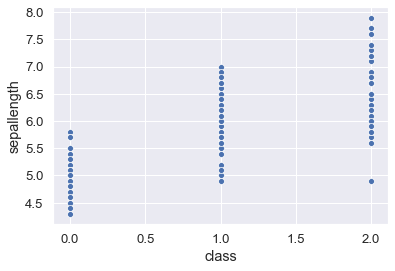

In [10]:
sns.scatterplot(x='class',y='sepallength', data=iris);

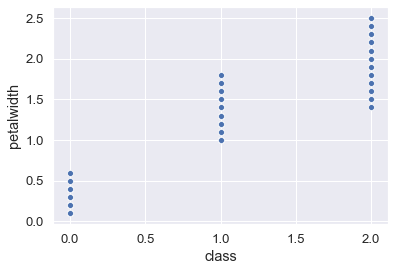

In [11]:
sns.scatterplot(x='class',y='petalwidth', data=iris);

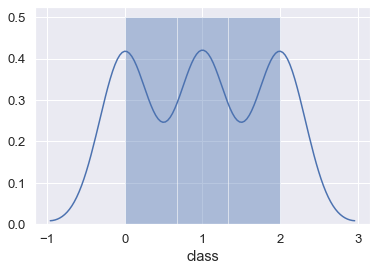

In [12]:
sns.distplot(a=iris['class']);

In [13]:
exp_clf101 = setup(data = iris, target = 'class', session_id=123) 

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Multiclass
2,Label Encoded,None
3,Original Data,"(150, 5)"
4,Missing Values,False
5,Numeric Features,4
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [14]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,1.0000,0.0,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0,1.0000,1.0000,1.0000,1.0000
2,0.9091,0.0,0.8889,0.9273,0.9051,0.8608
3,0.8182,0.0,0.7778,0.8788,0.7909,0.7179
4,1.0000,0.0,1.0000,1.0000,1.0000,1.0000
5,0.9000,0.0,0.8889,0.9200,0.8956,0.8462
6,1.0000,0.0,1.0000,1.0000,1.0000,1.0000
7,0.9000,0.0,0.9167,0.9250,0.9000,0.8507
8,0.9000,0.0,0.8889,0.9200,0.8956,0.8462
9,1.0000,0.0,1.0000,1.0000,1.0000,1.0000


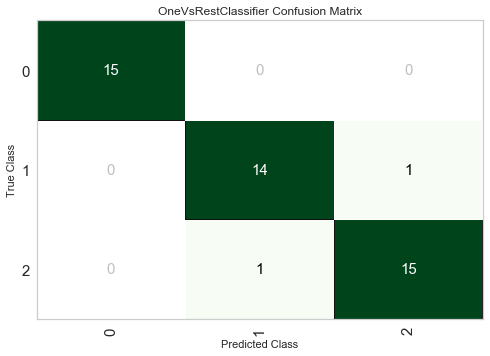

In [15]:
plot_model(dt, plot = 'confusion_matrix')

In [16]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,1.0000,0.0,1.0000,1.0000,1.0000,1.0000
1,1.0000,0.0,1.0000,1.0000,1.0000,1.0000
2,0.8182,0.0,0.8056,0.8182,0.8182,0.7250
3,0.8182,0.0,0.8333,0.8909,0.8106,0.7317
4,1.0000,0.0,1.0000,1.0000,1.0000,1.0000
5,0.9000,0.0,0.8889,0.9200,0.8956,0.8462
6,1.0000,0.0,1.0000,1.0000,1.0000,1.0000
7,0.9000,0.0,0.9167,0.9250,0.9000,0.8507
8,0.9000,0.0,0.8889,0.9200,0.8956,0.8462
9,1.0000,0.0,1.0000,1.0000,1.0000,1.0000


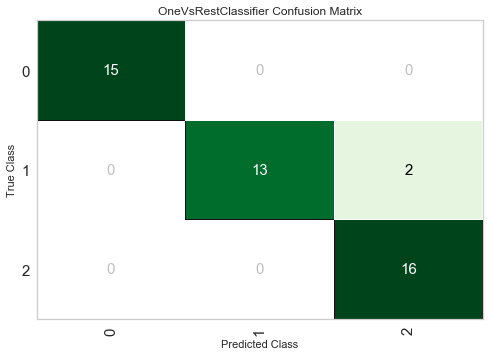

In [17]:
plot_model(lr, plot = 'confusion_matrix')

In [18]:
glass = pd.read_csv("glass.csv")

In [19]:
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.0,0.00,'build wind float'
1,1.51643,12.16,3.52,1.35,72.89,0.57,8.53,0.0,0.00,'vehic wind float'
2,1.51793,13.21,3.48,1.41,72.64,0.59,8.43,0.0,0.00,'build wind float'
3,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.0,0.00,tableware
4,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.0,0.24,'build wind non-float'
...,...,...,...,...,...,...,...,...,...,...
209,1.51610,13.42,3.40,1.22,72.69,0.59,8.32,0.0,0.00,'vehic wind float'
210,1.51592,12.86,3.52,2.12,72.66,0.69,7.97,0.0,0.00,'build wind non-float'
211,1.51613,13.92,3.52,1.25,72.88,0.37,7.94,0.0,0.14,'build wind non-float'
212,1.51689,12.67,2.88,1.71,73.21,0.73,8.54,0.0,0.00,'build wind non-float'


In [20]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [21]:
scaler = StandardScaler()

In [22]:
X = glass.drop(columns="Type")

In [23]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.51793,12.79,3.50,1.12,73.03,0.64,8.77,0.0,0.00
1,1.51643,12.16,3.52,1.35,72.89,0.57,8.53,0.0,0.00
2,1.51793,13.21,3.48,1.41,72.64,0.59,8.43,0.0,0.00
3,1.51299,14.40,1.74,1.54,74.55,0.00,7.59,0.0,0.00
4,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.0,0.24
...,...,...,...,...,...,...,...,...,...
209,1.51610,13.42,3.40,1.22,72.69,0.59,8.32,0.0,0.00
210,1.51592,12.86,3.52,2.12,72.66,0.69,7.97,0.0,0.00
211,1.51613,13.92,3.52,1.25,72.88,0.37,7.94,0.0,0.14
212,1.51689,12.67,2.88,1.71,73.21,0.73,8.54,0.0,0.00


In [24]:
X_transform = scaler.fit_transform(X)

In [25]:
X_transform 

array([[-0.14371454, -0.75838406,  0.56667696, ..., -0.13168009,
        -0.35287683, -0.5864509 ],
       [-0.63880327, -1.53168114,  0.58057517, ..., -0.30071507,
        -0.35287683, -0.5864509 ],
       [-0.14371454, -0.24285268,  0.55277874, ..., -0.37114631,
        -0.35287683, -0.5864509 ],
       ...,
       [-0.73782101,  0.62864085,  0.58057517, ..., -0.7162594 ,
        -0.35287683,  0.85371869],
       [-0.48697606, -0.90567874,  0.13583231, ..., -0.29367195,
        -0.35287683, -0.5864509 ],
       [ 0.05102036,  0.83730832, -0.34365608, ...,  0.25569174,
        -0.35287683, -0.5864509 ]])

In [26]:
lens = pd.read_csv("contactlenses.csv")

In [27]:
lens

,age,spectacle-prescrip,astigmatism,tear-prod-rate,contact-lenses
0,young,myope,no,reduced,none
1,young,myope,no,normal,soft
2,young,myope,yes,reduced,none
3,young,myope,yes,normal,hard
4,young,hypermetrope,no,reduced,none
5,young,hypermetrope,no,normal,soft
6,young,hypermetrope,yes,reduced,none
7,young,hypermetrope,yes,normal,hard
8,pre-presbyopic,myope,no,reduced,none
9,pre-presbyopic,myope,no,normal,soft


In [28]:
lens['age'].value_counts()

young             8
presbyopic        8
pre-presbyopic    8
Name: age, dtype: int64

In [29]:
lens['tear-prod-rate'].value_counts()

reduced    12
normal     12
Name: tear-prod-rate, dtype: int64

In [30]:
anneal = pd.read_csv("anneal.csv")

In [31]:
anneal

,family,product-type,steel,carbon,hardness,temper_rolling,condition,formability,strength,non-ageing,...,s,p,shape,thick,width,len,oil,bore,packing,class
0,NaN,C,A,8,0,NaN,S,NaN,0,NaN,...,NaN,NaN,COIL,0.700,610.0,0,NaN,0,NaN,3
1,NaN,C,R,0,0,NaN,S,2.0,0,NaN,...,NaN,NaN,COIL,3.200,610.0,0,NaN,0,NaN,3
2,NaN,C,R,0,0,NaN,S,2.0,0,NaN,...,NaN,NaN,SHEET,0.700,1300.0,762,NaN,0,NaN,3
3,NaN,C,A,0,60,T,NaN,NaN,0,NaN,...,NaN,NaN,COIL,2.801,385.1,0,NaN,0,NaN,3
4,NaN,C,A,0,60,T,NaN,NaN,0,NaN,...,NaN,NaN,SHEET,0.801,255.0,269,NaN,0,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,NaN,C,R,0,0,NaN,S,3.0,0,NaN,...,NaN,NaN,SHEET,1.599,610.0,762,NaN,0,NaN,2
894,NaN,C,R,0,0,NaN,S,3.0,0,NaN,...,NaN,NaN,SHEET,1.601,830.0,880,NaN,0,NaN,2
895,NaN,C,V,0,0,NaN,S,2.0,0,NaN,...,NaN,NaN,SHEET,1.599,150.0,762,NaN,0,NaN,2
896,NaN,C,A,0,85,T,NaN,NaN,0,NaN,...,NaN,NaN,COIL,0.400,20.0,0,NaN,0,NaN,U


In [32]:
anneal.shape

(898, 39)

In [33]:
anneal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 39 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   family                  126 non-null    object 
 1   product-type            898 non-null    object 
 2   steel                   812 non-null    object 
 3   carbon                  898 non-null    int64  
 4   hardness                898 non-null    int64  
 5   temper_rolling          137 non-null    object 
 6   condition               595 non-null    object 
 7   formability             580 non-null    float64
 8   strength                898 non-null    int64  
 9   non-ageing              105 non-null    object 
 10  surface-finish          9 non-null      object 
 11  surface-quality         654 non-null    object 
 12  enamelability           16 non-null     float64
 13  bc                      1 non-null      object 
 14  bf                      129 non-null    ob

In [34]:
anneal.columns

Index(['family', 'product-type', 'steel', 'carbon', 'hardness',
       'temper_rolling', 'condition', 'formability', 'strength', 'non-ageing',
       'surface-finish', 'surface-quality', 'enamelability', 'bc', 'bf', 'bt',
       'bw/me', 'bl', 'm', 'chrom', 'phos', 'cbond', 'marvi', 'exptl', 'ferro',
       'corr', 'blue/bright/varn/clean', 'lustre', 'jurofm', 's', 'p', 'shape',
       'thick', 'width', 'len', 'oil', 'bore', 'packing', 'class'],
      dtype='object')

TypeError: Must pass values for either `x` or `y`

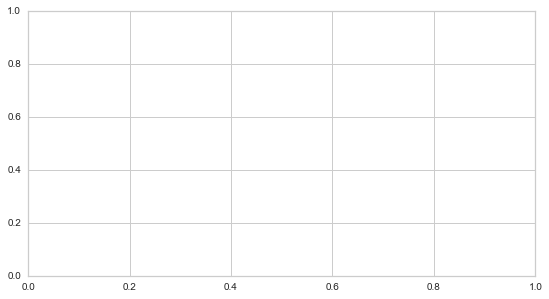

In [35]:
fig = plt.figure(figsize=(20,40))

plt.subplot(7,2,1)
plt.title("")
sns.countplot()

plt.subplot(7,2,2)
plt.title("")
sns.countplot()

plt.subplot(7,2,3)
plt.title("")
sns.countplot()

plt.subplot(7,2,4)
plt.title("")
sns.countplot()

plt.subplot(7,2,5)
plt.title("")
sns.countplot()

plt.subplot(7,2,6)
plt.title("")
sns.countplot()

plt.subplot(7,2,7)
plt.title("")
sns.countplot()

plt.subplot(7,2,8)
plt.title("")
sns.countplot()

plt.subplot(7,2,9)
plt.title("")
sns.countplot()

plt.subplot(7,2,10)
plt.title("")
sns.countplot()

plt.subplot(7,2,11)
plt.title("")
sns.countplot()

plt.subplot(7,2,12)
plt.title("")
sns.countplot()

plt.subplot(7,2,13)
plt.title("")
sns.countplot()

plt.subplot(7,2,14)
plt.title("")
sns.countplot()

plt.tight_layout()
plt.show()